In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

data = pd.read_csv("twitter_data.csv")
print(data.head())

                    id      conversation_id               created_at  \
0  1569867529010712577  1569519513363968001  2022-09-14 01:56:00 UTC   
1  1569867528381386754  1569867528381386754  2022-09-14 01:56:00 UTC   
2  1569867527479611392  1569867527479611392  2022-09-14 01:55:59 UTC   
3  1569867526536073216  1569822795940655105  2022-09-14 01:55:59 UTC   
4  1569867522245103616  1569867522245103616  2022-09-14 01:55:58 UTC   

         date      time  timezone              user_id         username  \
0  2022-09-14  01:56:00         0           2474200088    michelleviise   
1  2022-09-14  01:56:00         0  1519540154985242624   davidbellomast   
2  2022-09-14  01:55:59         0            282762416       lasher1332   
3  2022-09-14  01:55:59         0  1511742565414244352    heyshreyanshu   
4  2022-09-14  01:55:58         0  1272052285858816000  int_affairsnews   

                      name place  ... geo source user_rt_id user_rt  \
0           Michelle Viise   NaN  ... NaN    

In [4]:
data.isna().sum()

id                     0
conversation_id        0
created_at             0
date                   0
time                   0
timezone               0
user_id                0
username               0
name                   0
place              10005
tweet                  0
language               0
mentions               0
urls                   0
photos                 0
replies_count          0
retweets_count         0
likes_count            0
hashtags               0
cashtags               0
link                   0
retweet                0
quote_url           9143
video                  0
thumbnail           9026
near               10007
geo                10007
source             10007
user_rt_id         10007
user_rt            10007
retweet_id         10007
reply_to               0
retweet_date       10007
translate          10007
trans_src          10007
trans_dest         10007
dtype: int64

In [5]:
data.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [7]:
data = data[["username", "tweet", "language"]]

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10007 entries, 0 to 10006
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   username  10007 non-null  object
 1   tweet     10007 non-null  object
 2   language  10007 non-null  object
dtypes: object(3)
memory usage: 234.7+ KB


In [8]:
data.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

In [9]:
data['language'].value_counts()

en     8927
pt      414
it      194
qme      74
in       58
und      47
de       47
es       37
zh       31
ja       30
ru       19
qht      16
ca       16
nl       14
fi       11
fr       11
th        9
uk        7
vi        5
ar        5
ro        5
tl        5
qam       4
hi        3
et        3
da        3
no        2
cs        2
ko        2
pl        2
cy        1
sv        1
am        1
is        1
Name: language, dtype: int64

In [10]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kas\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


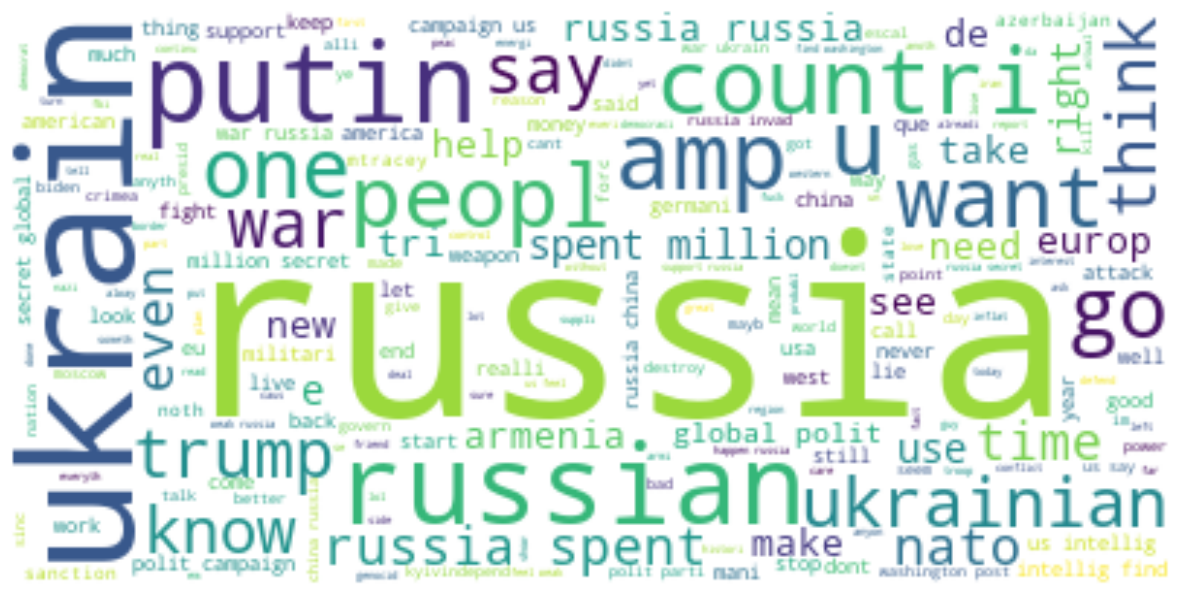

In [11]:
text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [14]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]
data = data[["tweet", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Kas\AppData\Roaming\nltk_data...


                                               tweet  Positive  Negative  \
0  simonforco took  year war russia ukrain us act...     0.119     0.183   
1  ethiopian troll copi russia everyth bad russia...     0.000     0.333   
2  damn commi charg r desper theyr shake boot alp...     0.000     0.173   
3  derekjgrossman dont think iran worth much indi...     0.000     0.156   
4  utah ukrainian communiti hope counterattack ru...     0.487     0.000   

   Neutral  
0    0.698  
1    0.667  
2    0.827  
3    0.844  
4    0.513  


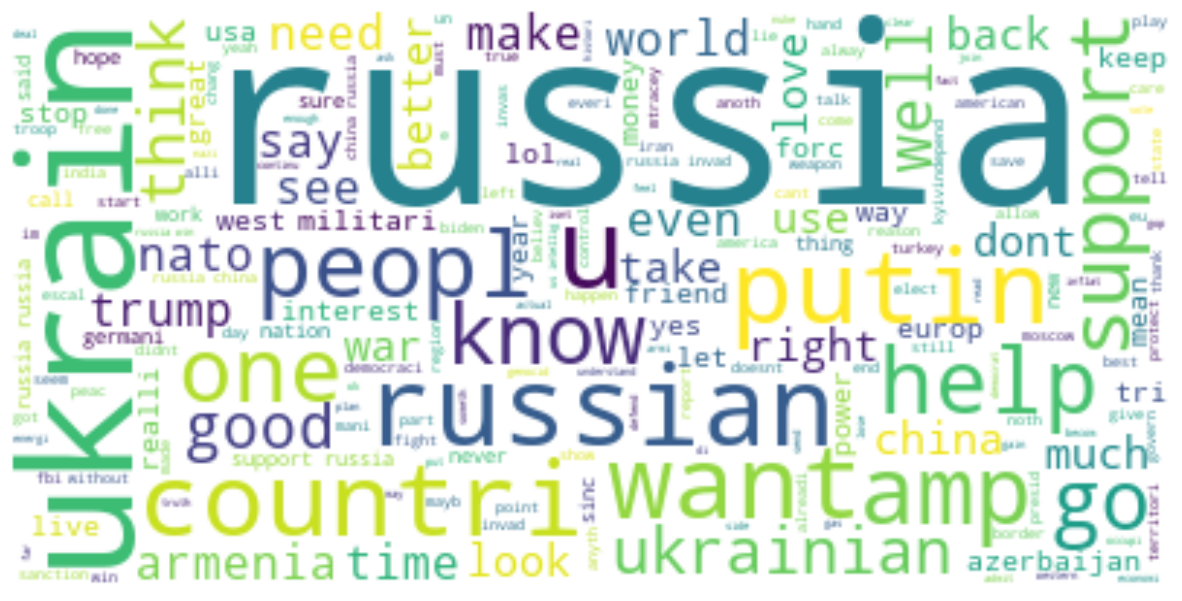

In [15]:
positive =' '.join([i for i in data['tweet'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

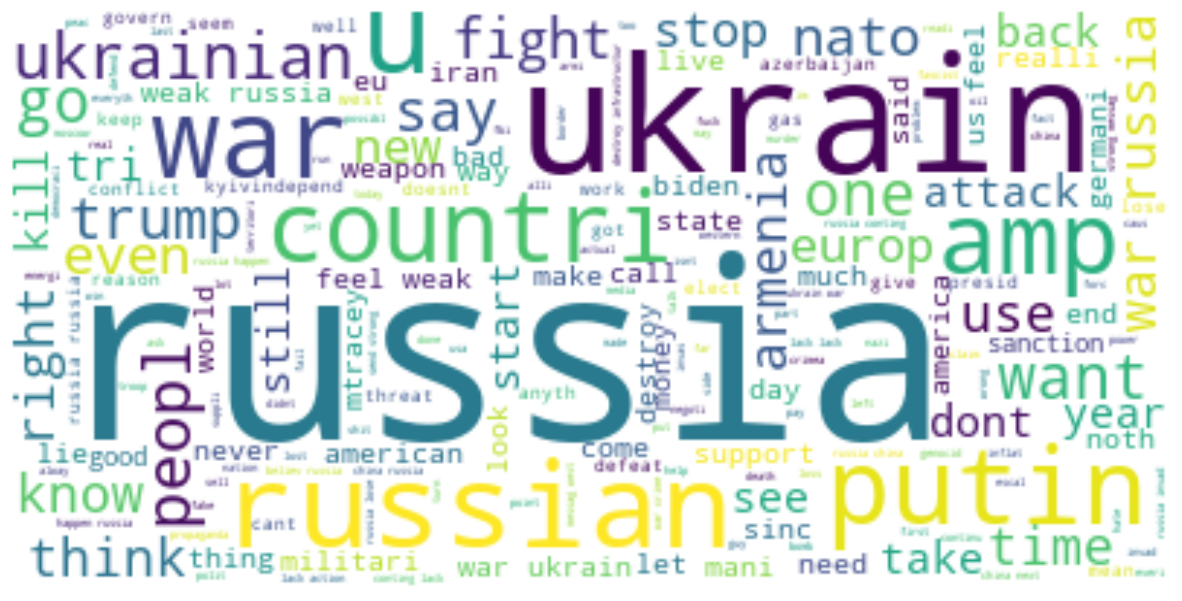

In [16]:
negative =' '.join([i for i in data['tweet'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()